<a href="https://colab.research.google.com/github/XM2202-02/hello-github-actions/blob/main/Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Dropout

In [7]:
datagen = ImageDataGenerator(rescale=1./255)
generator= datagen.flow_from_directory(
    '/content/drive/MyDrive/Flower',
    target_size=(32, 32),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
test_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Flower',
    target_size=(32, 32),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
class_label=['Elon Musk','Miss TThuy','Misthy','Quan0go','The Weeknd','Tlinh']
X_batch,y_batch= next(generator)
X_batch_flat=X_batch.reshape(X_batch.shape[0],-1)
x_train, y_train = next(generator)
x_test, y_test = next(test_generator)
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print('Nhap vao:', X_batch_flat.shape)
print('Ket qua:', y_batch.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

Found 25 images belonging to 5 classes.
Found 25 images belonging to 5 classes.
Nhap vao: (25, 3072)
Ket qua: (25, 5)
(25, 3072) (25, 5)
(25, 3072) (25, 5)


In [12]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(32*32*3,)),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test_acc:%.2f'%(test_acc))
generator.class_indices

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2800 - loss: 1.6660 - val_accuracy: 0.2000 - val_loss: 2.2033
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.2000 - loss: 2.2033 - val_accuracy: 0.3600 - val_loss: 2.6348
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.3600 - loss: 2.6348 - val_accuracy: 0.4000 - val_loss: 2.8621
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - accuracy: 0.4000 - loss: 2.8621 - val_accuracy: 0.6000 - val_loss: 2.1151
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.6000 - loss: 2.1151 - val_accuracy: 0.4400 - val_loss: 1.5464
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.4400 - loss: 1.5464 - val_accuracy: 0.6800 - val_loss: 1.0294
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.6800 - loss: 1.0294 - val_accuracy: 0.2800 - val_loss: 1.2854
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.2800 - loss: 1.2854 - val_accuracy: 0.6400 - val_loss: 0.9279
Epoch 

{'Cam tu cau': 0, 'Dao': 1, 'Hong': 2, 'Linh lan': 3, 'Tulip': 4}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Dự đoán: Cam tu cau


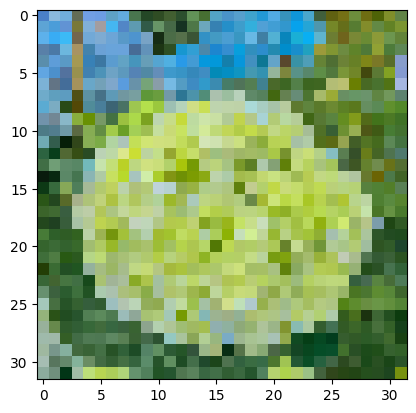

In [13]:
img=load_img('/content/drive/MyDrive/Flower/Cam tu cau/Ảnh chụp màn hình 2025-04-14 013201.png', target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img_flatten=img.reshape(1,32*32*3)
img = img_to_array(img)
img_flatten = img_flatten.astype('float32') / 255
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))
class_labels = list(generator.class_indices.keys())
print("Dự đoán:", class_labels[predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Dự đoán: Dao


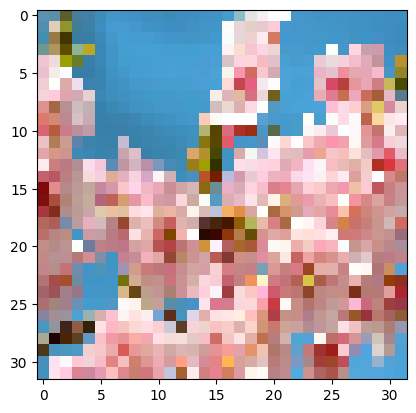

In [14]:
img=load_img('/content/drive/MyDrive/Flower/Dao/Ảnh chụp màn hình 2025-04-14 012856.png', target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img_flatten=img.reshape(1,32*32*3)
img = img_to_array(img)
img_flatten = img_flatten.astype('float32') / 255
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))
class_labels = list(generator.class_indices.keys())
print("Dự đoán:", class_labels[predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Dự đoán: Hong


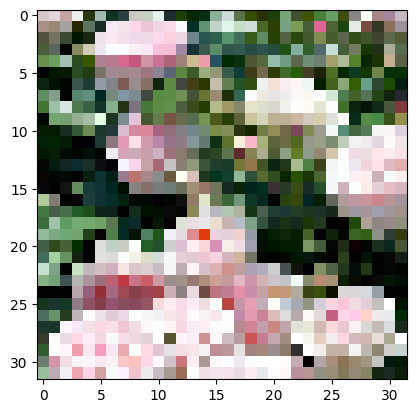

In [15]:
img=load_img('/content/drive/MyDrive/Flower/Hong/Ảnh chụp màn hình 2025-04-14 013014.png', target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img_flatten=img.reshape(1,32*32*3)
img = img_to_array(img)
img_flatten = img_flatten.astype('float32') / 255
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))
class_labels = list(generator.class_indices.keys())
print("Dự đoán:", class_labels[predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Dự đoán: Linh lan


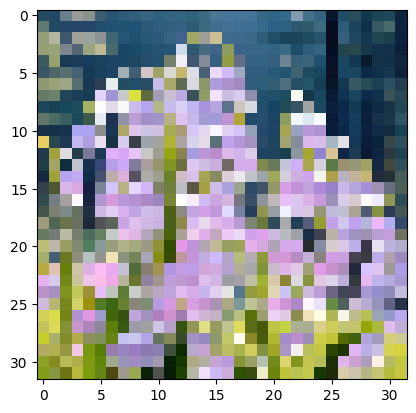

In [16]:
img=load_img('/content/drive/MyDrive/Flower/Linh lan/Ảnh chụp màn hình 2025-04-14 013304.png', target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img_flatten=img.reshape(1,32*32*3)
img = img_to_array(img)
img_flatten = img_flatten.astype('float32') / 255
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))
class_labels = list(generator.class_indices.keys())
print("Dự đoán:", class_labels[predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Dự đoán: Tulip


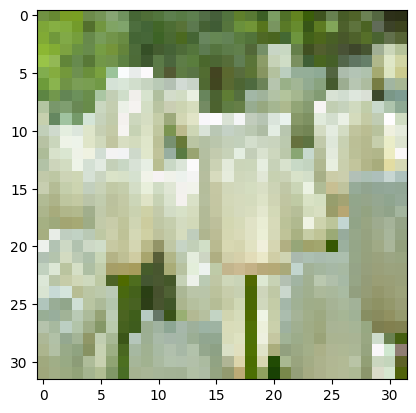

In [17]:
img=load_img('/content/drive/MyDrive/Flower/Tulip/Ảnh chụp màn hình 2025-04-14 013112.png', target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img_flatten=img.reshape(1,32*32*3)
img = img_to_array(img)
img_flatten = img_flatten.astype('float32') / 255
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))
class_labels = list(generator.class_indices.keys())
print("Dự đoán:", class_labels[predicted_class_index])